# MAJOR PROJECT 
## THREAD REVIEW SENTIMENTAL ANALYSIS WITH TKINTER GUI & TABLEAU DASHBOARD

# IMPORTING NECESSARY LIBRARIES

In [3]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def analyze_sentiment(text):
    # Your sentiment analysis code here
    # For demonstration, we'll assume it returns 'positive', 'negative', or 'neutral'
    return 'positive'

# READING CSV FILE

In [5]:
df=pd.read_csv('threads_reviews 3.csv')
df

,source,review_date,review_description,rating
0,Google Play,08/07/2023 14:18,Meh. Not the greatest experience on a Chromebo...,2
1,Google Play,19/07/2023 20:52,Pretty good for a first launch!! Its easy to u...,3
2,Google Play,06/07/2023 23:03,"For a brand new app, it's very well optimized....",3
3,Google Play,10/07/2023 00:53,"Great app with a lot of potential! However, th...",3
4,Google Play,06/07/2023 16:57,"The app is good, but it needs a lot of functio...",3
...,...,...,...,...
32905,App Store,06/07/2023 01:23,This killed my dog. Mark zuckerburg strangled ...,1
32906,App Store,19/07/2023 08:01,Add Search and hashtag like Twitter !,1
32907,App Store,17/07/2023 06:39,bad twister,1
32908,App Store,07/07/2023 17:47,Yet another trash from Meta.,1


# GETTING SUMMARY OF DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_date         32910 non-null  object
 2   review_description  32910 non-null  object
 3   rating              32910 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [7]:
df=df.drop(['source'],axis=1)

In [8]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


# CLEANING THE DATASET

In [9]:
df.duplicated(subset='rating').sum()

32905

In [10]:
# There is 1 Duplicated tweet in our Data..lets Remove it
df.drop_duplicates(subset='rating',inplace=True)

In [11]:
df.duplicated(subset='rating').sum()

0

In [12]:
# Converting Date column from object to datetime format
df['review_date']=pd.to_datetime(df['review_date'])

In [13]:
df.sort_values(by='rating',ascending=False).head(20)

,review_date,review_description,rating
9,2023-06-07 23:41:00,Not bad! This is its first launch. There is st...,5
22,2023-07-07 20:00:00,It's not bad so far. A handful of unsolicited ...,4
1,2023-07-19 20:52:00,Pretty good for a first launch!! Its easy to u...,3
0,2023-08-07 14:18:00,Meh. Not the greatest experience on a Chromebo...,2
6,2023-07-19 19:35:00,I still don’t want to see content from people ...,1


# EDA

<AxesSubplot:>

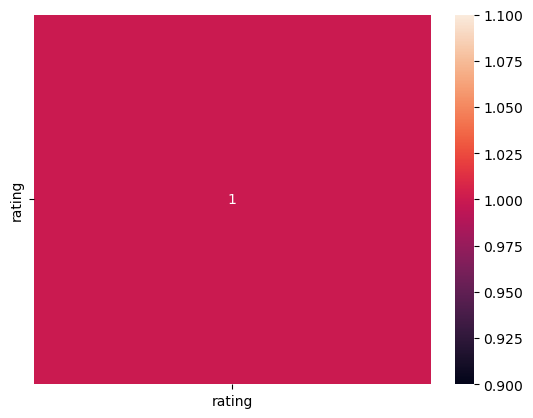

In [14]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='rating'>

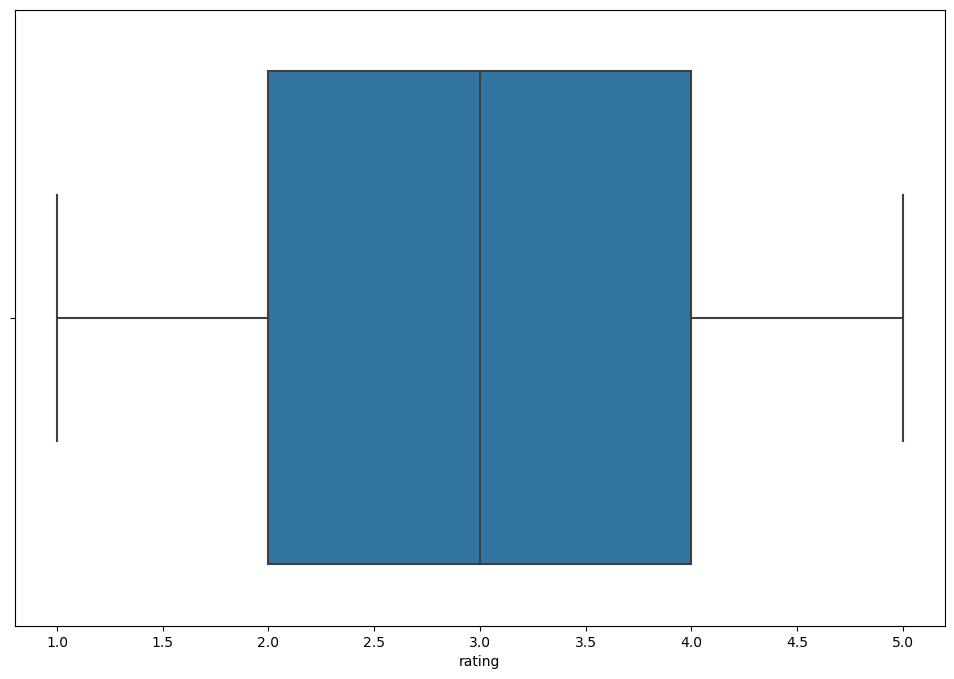

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='rating')

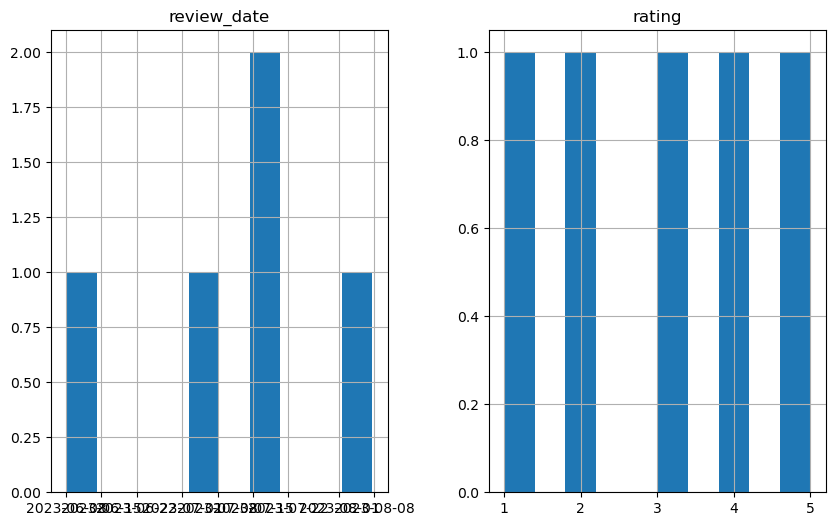

In [16]:
df.hist(figsize=(10,6));

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

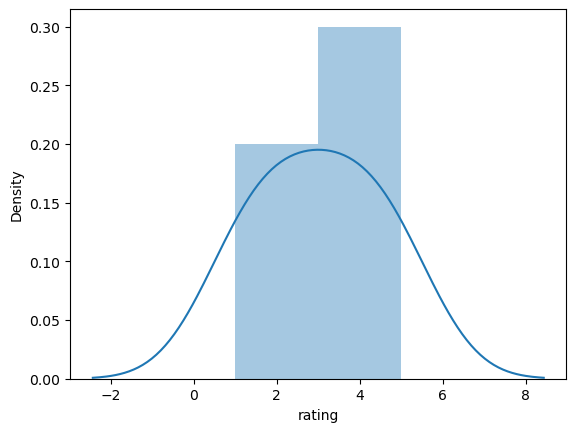

In [17]:
sns.distplot(df['rating'])

<AxesSubplot:xlabel='rating', ylabel='review_date'>

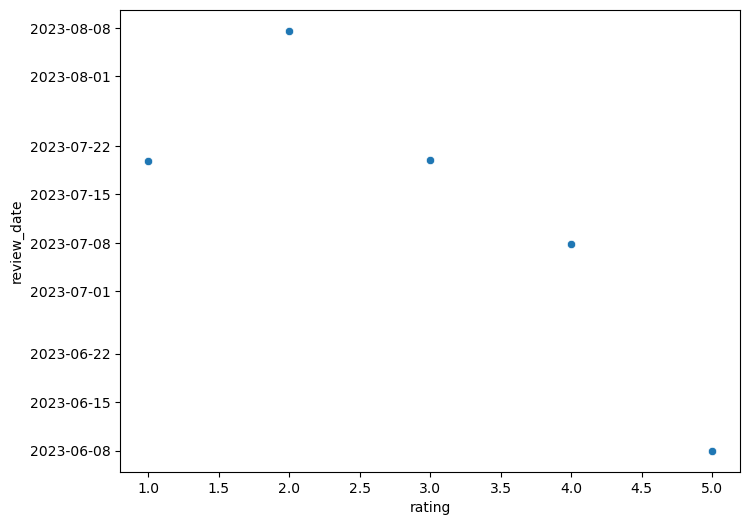

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rating',y='review_date',data=df)

# TEXT PRE-PROCESSING

In [19]:
#!pip install langdetect

In [20]:
# Removing all rows which having local languges used..we will only keeping those rows where English language present
from langdetect import detect

In [21]:
def keep_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            return np.nan
    except:
        return np.nan

In [22]:
df['review_description'].apply(keep_english).isnull().sum()

0

In [23]:
new_df=df['review_description'].apply(keep_english)

In [24]:
new_df=pd.DataFrame({'review_description':new_df})

In [25]:
li=new_df[new_df['review_description'].isnull()].index.to_list()

In [26]:
new_df=new_df.dropna(subset=["review_description"])

In [27]:
new_df.shape

(5, 1)

In [28]:
data1=new_df.copy()

# DATA TRANSFORMATION

In [29]:
# Making statement text in lower case
data1['new_review_description']=data1['review_description'].str.lower()
data1['new_review_description'].tail()

0     meh. not the greatest experience on a chromebo...
1     pretty good for a first launch!! its easy to u...
6     i still don’t want to see content from people ...
9     not bad! this is its first launch. there is st...
22    it's not bad so far. a handful of unsolicited ...
Name: new_review_description, dtype: object

In [30]:
# Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [31]:
# Cleaning and removing the above stop words list from the tweet text
pd.options.display.max_colwidth = 50
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])
data1['new_review_description'] = data1['new_review_description'].apply(lambda text: cleaning_stopwords(text))
data1['new_review_description'].head()

0     meh. not greatest experience chromebook. seems...
1     pretty good first launch!! easy use self-expla...
6     still don’t want see content people don’t spec...
9     not bad! first launch. still room improvements...
22    it's not bad far. handful unsolicited requests...
Name: new_review_description, dtype: object

In [32]:
def clean_review_description (review_description):
    # Remove hashtags, mentions, and URLs
    review_description = re.sub(r'#\w+', '', review_description)
    review_description = re.sub(r'@\w+', '', review_description)
    review_description = re.sub(r'https?://\S+', '', review_description)
    
    # Remove extra spaces
    review_description = re.sub(' +', ' ', review_description).strip()
    
    return review_description

data1['new_review_description'] = data1['new_review_description'].apply(lambda x: clean_review_description(x))
data1['new_review_description'].tail()

0     meh. not greatest experience chromebook. seems...
1     pretty good first launch!! easy use self-expla...
6     still don’t want see content people don’t spec...
9     not bad! first launch. still room improvements...
22    it's not bad far. handful unsolicited requests...
Name: new_review_description, dtype: object

In [33]:
data1['new_review_description'].head()

0     meh. not greatest experience chromebook. seems...
1     pretty good first launch!! easy use self-expla...
6     still don’t want see content people don’t spec...
9     not bad! first launch. still room improvements...
22    it's not bad far. handful unsolicited requests...
Name: new_review_description, dtype: object

In [34]:
#Clean emojis from text
def remove_emoji(review_description):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_description)
data1['new_review_description'] = data1['new_review_description'].apply(lambda text: remove_emoji(text))
data1['new_review_description'].head()

0     meh. not greatest experience chromebook. seems...
1     pretty good first launch!! easy use self-expla...
6     still don’t want see content people don’t spec...
9     not bad! first launch. still room improvements...
22    it's not bad far. handful unsolicited requests...
Name: new_review_description, dtype: object

In [35]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data1['new_review_description']= data1['new_review_description'].apply(lambda x: cleaning_punctuations(x))
data1['new_review_description'].tail()

0     meh not greatest experience chromebook seems c...
1     pretty good first launch easy use selfexplanat...
6     still don’t want see content people don’t spec...
9     not bad first launch still room improvements w...
22    its not bad far handful unsolicited requests b...
Name: new_review_description, dtype: object

In [36]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data1['new_review_description']= data1['new_review_description'].apply(lambda x: cleaning_numbers(x))
data1['new_review_description'].tail()

0     meh not greatest experience chromebook seems c...
1     pretty good first launch easy use selfexplanat...
6     still don’t want see content people don’t spec...
9     not bad first launch still room improvements w...
22    its not bad far handful unsolicited requests b...
Name: new_review_description, dtype: object

In [37]:
# Rechecking With Duuplicates
df1=data1.copy()
df1.head()
review_description_df= df1.drop_duplicates(subset='new_review_description')

In [38]:
review_description_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_description      5 non-null      object
 1   new_review_description  5 non-null      object
dtypes: object(2)
memory usage: 120.0+ bytes



# GETTING TOKENIZATION OF THREAD TEXT 

In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/robindonal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
import re
def keep_only_text(x):
    review_description = re.sub(r'[^\x00-\x7F]+', '', x)
    return review_description
review_description_df['new_review_description']= review_description_df['new_review_description'].apply(lambda x: keep_only_text(x))
review_description_df['new_review_description'].head()

0     meh not greatest experience chromebook seems c...
1     pretty good first launch easy use selfexplanat...
6     still dont want see content people dont specif...
9     not bad first launch still room improvements w...
22    its not bad far handful unsolicited requests b...
Name: new_review_description, dtype: object

In [41]:
def tokenize(x):
    tokens = word_tokenize(x)
    return tokens
review_description_df['new_review_description']= review_description_df['new_review_description'].apply(lambda x: tokenize(x))
review_description_df['new_review_description'].head()

0     [meh, not, greatest, experience, chromebook, s...
1     [pretty, good, first, launch, easy, use, selfe...
6     [still, dont, want, see, content, people, dont...
9     [not, bad, first, launch, still, room, improve...
22    [its, not, bad, far, handful, unsolicited, req...
Name: new_review_description, dtype: object

# APPLYING STEMMING

In [42]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(x):
    text = [st.stem(word) for word in x]
    return text
review_description_df['new_review_description']= review_description_df['new_review_description'].apply(lambda x: stemming_on_text(x))
review_description_df['new_review_description'].head()

0     [meh, not, greatest, experi, chromebook, seem,...
1     [pretti, good, first, launch, easi, use, selfe...
6     [still, dont, want, see, content, peopl, dont,...
9     [not, bad, first, launch, still, room, improv,...
22    [it, not, bad, far, hand, unsolicit, request, ...
Name: new_review_description, dtype: object

# APPLYING LEMMATIZER

In [43]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/robindonal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/robindonal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizer_on_text(x):
    text=" ".join(x)
    lemmatized_word = lemmatizer.lemmatize(text)
    return lemmatized_word
review_description_df['new_review_description']= review_description_df['new_review_description'].apply(lambda x: lemmatizer_on_text(x))
review_description_df['new_review_description'].head()

0     meh not greatest experi chromebook seem custom...
1     pretti good first launch easi use selfexplanat...
6     still dont want see content peopl dont specif ...
9     not bad first launch still room improv would l...
22    it not bad far hand unsolicit request but they...
Name: new_review_description, dtype: object

In [45]:
from textblob import TextBlob
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

review_description_df['polarity'] = review_description_df['new_review_description'].apply(pol)
review_description_df['subjectivity'] = review_description_df['new_review_description'].apply(sub)

review_description_df.head(5)

,review_description,new_review_description,polarity,subjectivity
0,Meh. Not the greatest experience on a Chromebo...,meh not greatest experi chromebook seem custom...,-0.16250,0.645833
1,Pretty good for a first launch!! Its easy to u...,pretti good first launch easi use selfexplanat...,0.41875,0.505556
6,I still don’t want to see content from people ...,still dont want see content peopl dont specif ...,-0.26250,0.487500
9,Not bad! This is its first launch. There is st...,not bad first launch still room improv would l...,0.10000,0.466667
22,It's not bad so far. A handful of unsolicited ...,it not bad far hand unsolicit request but they...,0.29375,0.590278


In [46]:
def sentiment_analysis(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment >0 :
        return "Positive"
    else:
        return "Negative"
review_description_df['sentiments']= review_description_df['new_review_description'].apply(lambda text: sentiment_analysis(text))

In [47]:
review_description_df.sentiments.value_counts()

Positive    3
Negative    2
Name: sentiments, dtype: int64

# Plot a cloud of words for Positive and negative threads 

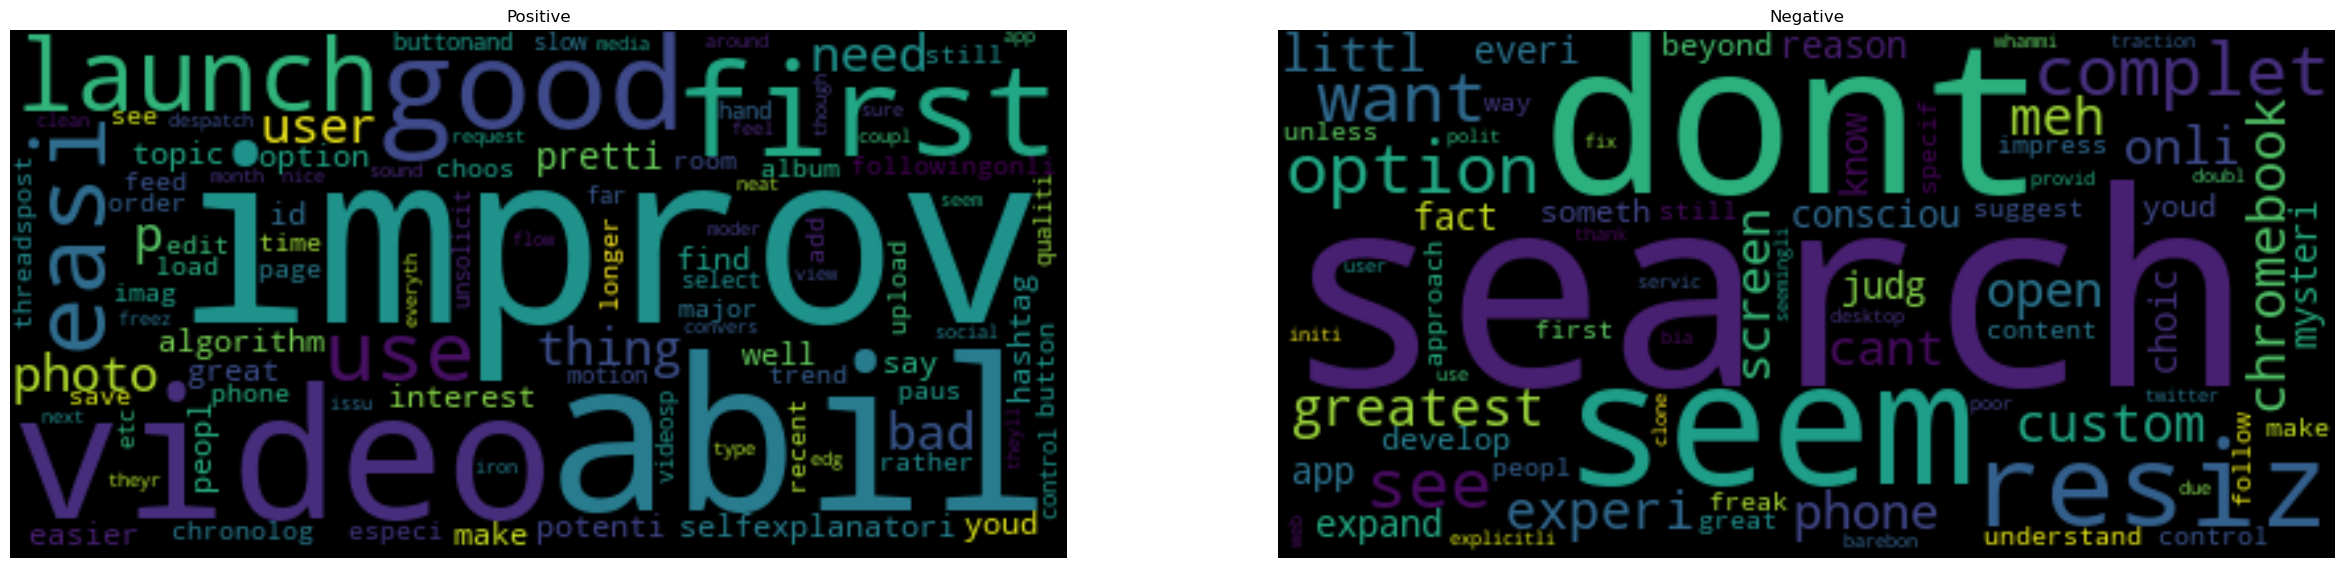

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split the texts based on polarity
positive_texts = list(review_description_df[review_description_df.sentiments=='Positive']['new_review_description'])
negative_texts = list(review_description_df[review_description_df.sentiments=='Negative']['new_review_description'])


# Join the texts into a single string for each sentiment
positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)


# Generate word clouds for each sentiment
positive_wordcloud = WordCloud().generate(positive_text)
negative_wordcloud = WordCloud().generate(negative_text)


# Plot the word clouds
plt.figure(figsize=(30, 30))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive")

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative")

plt.show()

In [49]:
'''
neutral_texts = list(review_description_df[review_description_df.sentiments=='Neutral']['new_review_description'])
neutral_text = " ".join(neutral_texts)
neutral_wordcloud = WordCloud().generate(neutral_text)
plt.subplot(111)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral")'''

'\nneutral_texts = list(review_description_df[review_description_df.sentiments==\'Neutral\'][\'new_review_description\'])\nneutral_text = " ".join(neutral_texts)\nneutral_wordcloud = WordCloud().generate(neutral_text)\nplt.subplot(111)\nplt.imshow(neutral_wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.title("Neutral")'

In [50]:
pd.options.display.max_colwidth = 1000
review_description_df[review_description_df.sentiments=='Positive']['review_description']

1     Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvement: -the ability to use hashtags would make it easier to find topics and people you'd be interested in -an option for a following-only feed would be a major improvement (especially chronological order) -the ability to choose images from albums rather than recent photos -the ability to save photos to phone
9                                                                                                                                                        Not bad! This is its first launch. There is still room for improvements... I would like to see a trending page, longer videos, and an edit button for any threads(posts) uploaded by the user. Improve the loading time. Add a pause button(and slow motion controls for videos). A quality selection on videos(1080p, 720p, 480p, etc).
22                                  

In [51]:
review_description_df[review_description_df.sentiments=='Negative']['review_description']

0    Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.
6                               I still don’t want to see content from people that I don’t specifically follow unless I explicitly search for it. And when I do search, I want to see an option for complete searches and not just user searches. This is a bare-bones poor clone of Twitter that seemingly is just getting some initial traction due to political bias. No thanks - fix it. Also, if you don’t provide a web desktop option to use the service, it’s a double whammy.
Name: review_description, dtype: object

# MODEL BUILDING

In [52]:
#Separating input feature and label
review_description_df['sentiments_num']= review_description_df.sentiments.replace({'Positive':1,'Negative':0})

In [53]:
review_description_df.head()

,review_description,new_review_description,polarity,subjectivity,sentiments,sentiments_num
0,"Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.",meh not greatest experi chromebook seem custom phone onli open littl screen cant expand resiz reason complet mysteri me judg fact everi app know resiz seem like consciou choic develop youd someth like beyond understand suggest control freak approach not great way make first impress,-0.16250,0.645833,Negative,0
1,Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvement: -the ability to use hashtags would make it easier to find topics and people you'd be interested in -an option for a following-only feed would be a major improvement (especially chronological order) -the ability to choose images from albums rather than recent photos -the ability to save photos to phone,pretti good first launch easi use selfexplanatori id say algorithm good well great potenti but thing need improv the abil use hashtag would make easier find topic peopl youd interest an option followingonli feed would major improv especi chronolog order the abil choos imag album rather recent photo the abil save photo phone,0.41875,0.505556,Positive,1
6,"I still don’t want to see content from people that I don’t specifically follow unless I explicitly search for it. And when I do search, I want to see an option for complete searches and not just user searches. This is a bare-bones poor clone of Twitter that seemingly is just getting some initial traction due to political bias. No thanks - fix it. Also, if you don’t provide a web desktop option to use the service, it’s a double whammy.",still dont want see content peopl dont specif follow unless explicitli search it search want see option complet search not user search barebon poor clone twitter seemingli get initi traction due polit bia no thank fix it also dont provid web desktop option use servic it doubl whammi,-0.26250,0.487500,Negative,0
9,"Not bad! This is its first launch. There is still room for improvements... I would like to see a trending page, longer videos, and an edit button for any threads(posts) uploaded by the user. Improve the loading time. Add a pause button(and slow motion controls for videos). A quality selection on videos(1080p, 720p, 480p, etc).",not bad first launch still room improv would like see trend page longer video edit button threadspost upload user improv load time add paus buttonand slow motion control video qualiti select videosp p p etc,0.10000,0.466667,Positive,1
22,"It's not bad so far. A handful of unsolicited requests, but they're easy to despatch of. Clean feel and just seems nice and neat around the edges. It's like a flowing conversation. As a moderate social media user, it does everything I need it to for the type of app it is. Some sound and freezing issues with some videos I have viewed, though I am sure they'll iron these things out over the next couple of months",it not bad far hand unsolicit request but theyr easi despatch of clean feel seem nice neat around edg it like flow convers moder social media user everyth need type app is sound freez issu video view though sure theyll iron thing over next coupl month,0.29375,0.590278,Positive,1


In [54]:
X=review_description_df.new_review_description
y=review_description_df.sentiments_num

# Splitting our data into Train and Test Subset

In [55]:
#Separating the 70% data for training data and 20% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =42)

In [56]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Transforming Dataset using TF-IDF Vectorizer

In [57]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train_strings = np.array([str(x) for x in X_train])
X_train_preprocessed = np.char.lower(X_train_strings)
vectoriser.fit(X_train_preprocessed)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  304


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
# Assuming X_train and X_test are NumPy arrays of strings
X_train_preprocessed = [str(x) for x in X_train]
X_test_preprocessed = [str(x) for x in X_test]

# Transforming the data
X_train = vectoriser.transform(X_train_preprocessed).toarray()
X_test = vectoriser.transform(X_test_preprocessed).toarray()

In [59]:
X_train.shape

(4, 304)

In [60]:
X_test.shape

(1, 304)

In [61]:
# Cross verifying that we have got correct rows
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [62]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, cmap = 'Blues',fmt = '',annot=True)

# MODEL TRAINING

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



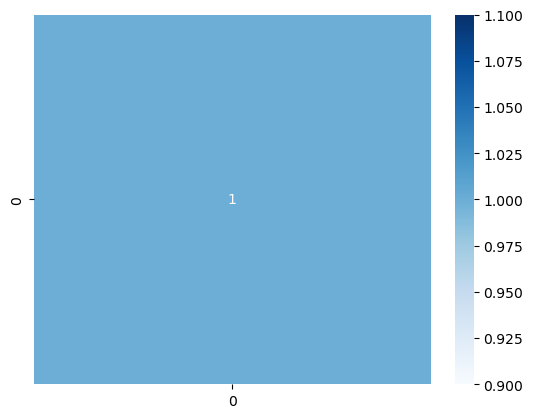

In [63]:
# Model-1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



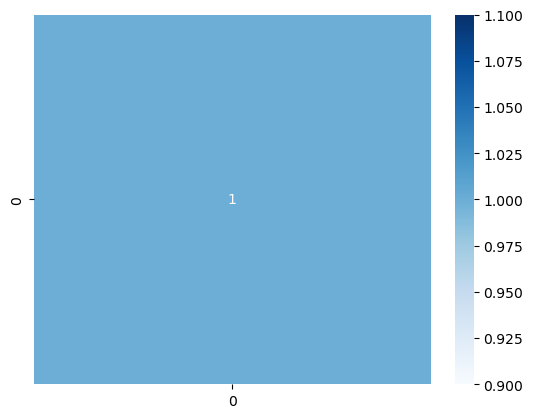

In [64]:
#model-2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



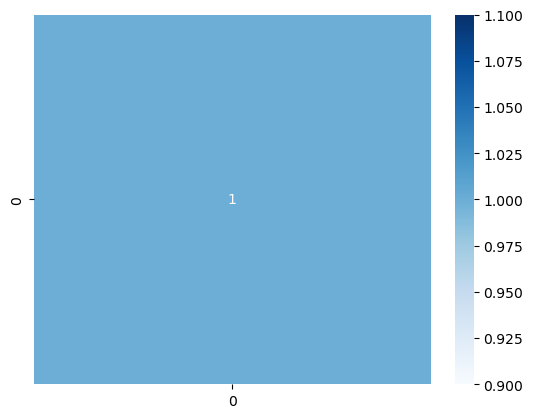

In [65]:
# model-3
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

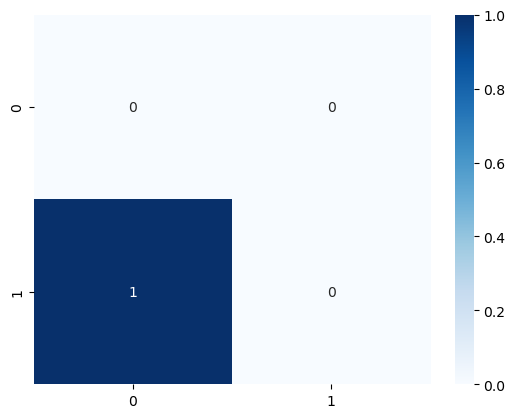

In [66]:
# model-4 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
model_Evaluate(clf)
y_pred4 = clf.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



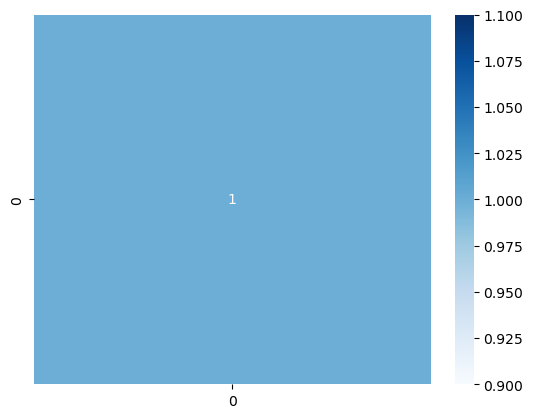

In [67]:
# model-5
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
model_Evaluate(MNBmodel)
y_pred5 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



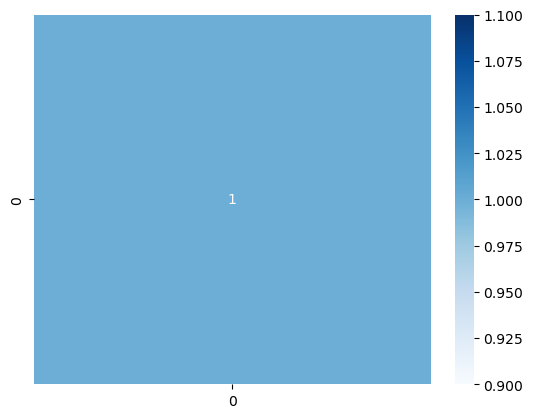

In [68]:
# model-6
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)
model_Evaluate(GNBmodel)
y_pred6 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

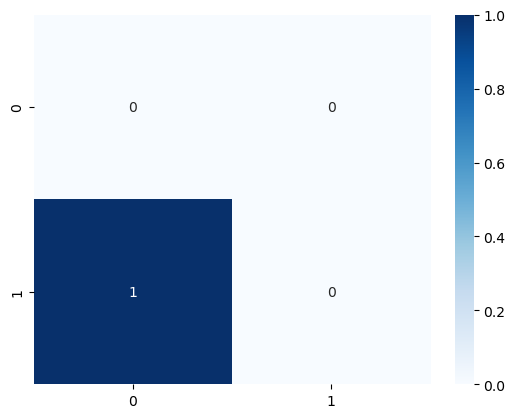

In [69]:
# model-7
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
model_Evaluate(dtree)
y_pred7 = dtree.predict(X_test)

In [ ]:
from textblob import TextBlob
x=input("Enter your Thread  ")
sentiment = TextBlob(x).sentiment.polarity
#print(sentiment)
if sentiment >0:
    print( "Positive")
elif sentiment ==0:
    print("Neutral")
else:
    print("Negative")

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
